#### Import libraries

In [1]:
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import detectron2
%matplotlib inline

In [2]:
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [3]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

#### Set configuration for detectron2

In [4]:
cfg = get_cfg()
cfg.MODEL.DEVICE='cpu'
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml")

#### Initialize predictor that is based on mask R-CNN

In [5]:
predictor = DefaultPredictor(cfg)

[04/22 07:07:16 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x/137260431/model_final_a54504.pkl ...


#### Read and plot an image from dataset

In [6]:
path = "E:/Experiments/Datasets/COCO/val2017/val2017/"
files = os.listdir(path)

In [7]:
len(files)

5000

(426, 640, 3)


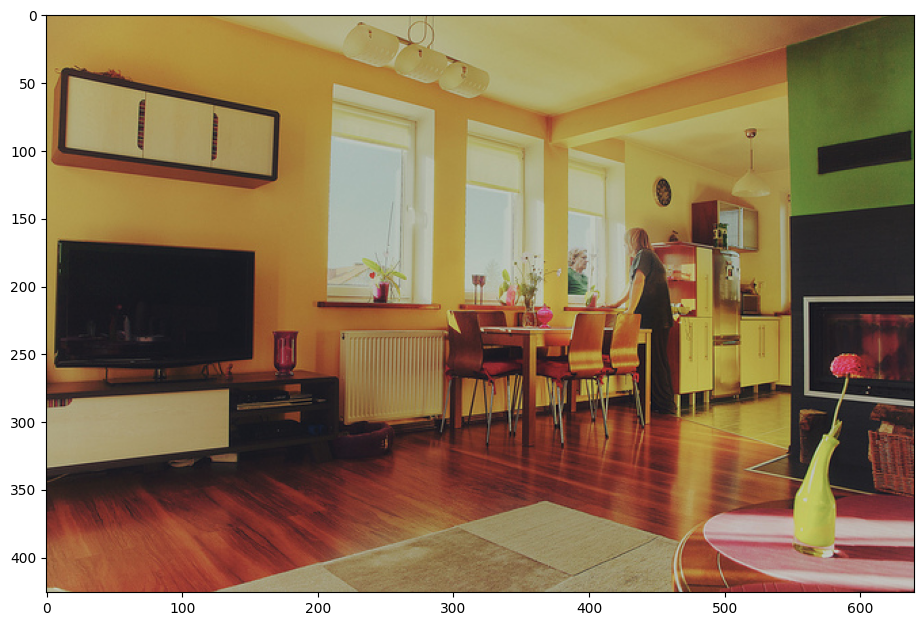

In [8]:
filename = files[0]
im = cv2.imread(path+filename)
print(im.shape)
plt.figure(figsize=(15,7.5))
plt.imshow(im[..., ::-1])

#### Predict output with mask R-CNN

In [9]:
outputs = predictor(im[..., ::-1])

C:\Users\user\anaconda3\envs\detectron_env\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


#### Draw bounding boxes and masks detected by mask R-CNN in the image

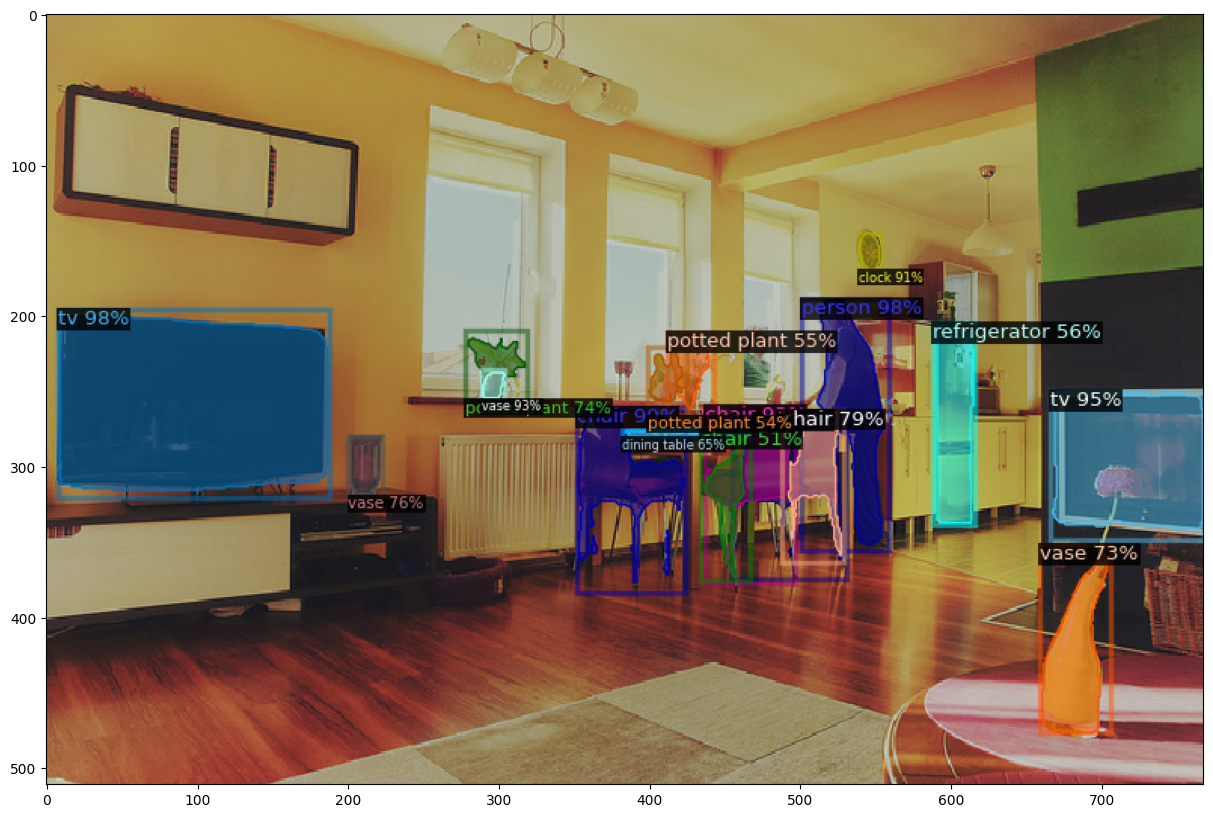

In [10]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize=(20,10))
plt.imshow(out.get_image()[..., ::-1][..., ::-1])

#### Identify predicted classes 

In [ ]:
outputs['instances'].get_fields().keys()

dict_keys(['pred_boxes', 'scores', 'pred_classes', 'pred_masks'])

In [ ]:
outputs['instances'].get('pred_classes')

tensor([56,  0, 62, 62, 56, 56, 75, 74, 56, 75, 58, 75, 60, 72, 58, 58, 56])

In [ ]:
predictor.metadata.as_dict()

{'name': 'coco_2017_val',
 'json_file': 'datasets\\coco/annotations/instances_val2017.json',
 'image_root': 'datasets\\coco/val2017',
 'evaluator_type': 'coco',
 'thing_dataset_id_to_contiguous_id': {1: 0,
  2: 1,
  3: 2,
  4: 3,
  5: 4,
  6: 5,
  7: 6,
  8: 7,
  9: 8,
  10: 9,
  11: 10,
  13: 11,
  14: 12,
  15: 13,
  16: 14,
  17: 15,
  18: 16,
  19: 17,
  20: 18,
  21: 19,
  22: 20,
  23: 21,
  24: 22,
  25: 23,
  27: 24,
  28: 25,
  31: 26,
  32: 27,
  33: 28,
  34: 29,
  35: 30,
  36: 31,
  37: 32,
  38: 33,
  39: 34,
  40: 35,
  41: 36,
  42: 37,
  43: 38,
  44: 39,
  46: 40,
  47: 41,
  48: 42,
  49: 43,
  50: 44,
  51: 45,
  52: 46,
  53: 47,
  54: 48,
  55: 49,
  56: 50,
  57: 51,
  58: 52,
  59: 53,
  60: 54,
  61: 55,
  62: 56,
  63: 57,
  64: 58,
  65: 59,
  67: 60,
  70: 61,
  72: 62,
  73: 63,
  74: 64,
  75: 65,
  76: 66,
  77: 67,
  78: 68,
  79: 69,
  80: 70,
  81: 71,
  82: 72,
  84: 73,
  85: 74,
  86: 75,
  87: 76,
  88: 77,
  89: 78,
  90: 79},
 'thing_classes': ['

#### Save image with bounding boxes and pixel masks on detected objects

In [ ]:
savepath = "E:/Experiments/Datasets/COCO/object_detection/"
out.save(savepath+filename)

#### Process multiple images

In [ ]:
for i in range(50):
    im = cv2.imread(path+files[i])
    outputs = predictor(im[..., ::-1])
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))   
    out.save(savepath+files[i])

#### Print metadata of predictor

In [ ]:
predictor.metadata.as_dict().keys()

dict_keys(['name', 'json_file', 'image_root', 'evaluator_type', 'thing_dataset_id_to_contiguous_id', 'thing_classes', 'thing_colors'])

In [ ]:
predictor.metadata.as_dict().values()

dict_values(['coco_2017_val', 'datasets\\coco/annotations/instances_val2017.json', 'datasets\\coco/val2017', 'coco', {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 13: 11, 14: 12, 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 27: 24, 28: 25, 31: 26, 32: 27, 33: 28, 34: 29, 35: 30, 36: 31, 37: 32, 38: 33, 39: 34, 40: 35, 41: 36, 42: 37, 43: 38, 44: 39, 46: 40, 47: 41, 48: 42, 49: 43, 50: 44, 51: 45, 52: 46, 53: 47, 54: 48, 55: 49, 56: 50, 57: 51, 58: 52, 59: 53, 60: 54, 61: 55, 62: 56, 63: 57, 64: 58, 65: 59, 67: 60, 70: 61, 72: 62, 73: 63, 74: 64, 75: 65, 76: 66, 77: 67, 78: 68, 79: 69, 80: 70, 81: 71, 82: 72, 84: 73, 85: 74, 86: 75, 87: 76, 88: 77, 89: 78, 90: 79}, ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', '

In [ ]:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', \
 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', \
 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', \
 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', \
 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', \
 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', \
 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']